<a href="https://colab.research.google.com/github/bringol/IA_TP_GRUPO_2/blob/main/Dataset_no_me_comas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset: Yellow Submarine
----

Cada fila representa un hongo, cada columna contiene atributos de este.

La columna *classes* indica si el hongo es venenoso o no.

hongos | atributos
:----:   | :----:
8124     | 23


# Variables

Nombre   |  Posibles valores
:------- |  :---
cap-shape   | (bell, conical, convex, flat, knobbed, sunken)
cap-surface | (fibrous, grooves, scaly, smooth)
cap-color | (brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow)
bruises | (bruises, no)
odor | (almond, anise, creosote, fishy, foul, musty, none, pungent, spicy)
gill-attachment | (attached, descending, free, notched)
gill-spacing | (close, crowded, distant)
gill-size | (broad, narrow)
gill-color | (black, brown, buff, chocolate, gray, green, orange, pink, purple, red, white, yellow)
stalk-shape | (enlarging, tapering)
stalk-root | (bulbous, club, cup, equal, rhizomorphs, rooted, missing)
stalk-surface-above-ring | (fibrous, scaly, silky, smooth)
stalk-surface-below-ring | (fibrous, scaly, silky, smooth)
stalk-color-above-ring | (brown, buff, cinnamon, gray, orange, pink, red, white, yellow)
stalk-color-below-ring | (brown, buff, cinnamon, gray, orange, pink, red, white, yellow)
veil-type | (partial, universal)
veil-color | (brown, orange, white, yellow)
ring-number | (none, one, two)
ring-type | (cobwebby, evanescent, flaring, large, none, pendant, sheathing, zone)
spore-print-color | (black, brown, buff, chocolate, green, orange, purple, white, yellow)
population | (abundant, clustered, numerous, scattered ,several, solitary)
habitat | (grasses, leaves, meadows, paths, urban, waste, woods)
classes   |  (edible, poisonous)

In [45]:
#@title Librerías y Cargado de Datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score,GridSearchCV,RandomizedSearchCV,cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import seaborn as sns
from scipy.stats import randint


# Cargar los datos
mushroom_data = pd.read_csv('Yellow_Submarine.csv')

In [46]:
#Genera estadísticas descriptivas de las columnas numéricas del DataFrame.
#Muestra información como la media, desviación estándar, valores mínimo y máximo, y percentiles.
#Ayuda a entender la distribución y rango de los datos numéricos.
mushroom_data.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [47]:
#Proporciona un resumen conciso del DataFrame.
#Muestra el número de filas y columnas, los nombres de las columnas, los tipos de datos de cada columna y la cantidad de valores no nulos.
#Útil para identificar rápidamente columnas con valores faltantes y verificar los tipos de datos.
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [89]:
#Muestra las primeras 5 filas del DataFrame.
#Permite visualizar rápidamente la estructura de los datos, los nombres de las columnas y algunos valores de ejemplo.
#Sirve para tener una primera impresión del contenido del DataFrame.
print(mushroom_data.head())

       class cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous       NaN         NaN       NaN  bruises  pungent   
1     edible       NaN         NaN       NaN  bruises   almond   
2     edible      bell         NaN     white  bruises    anise   
3  poisonous       NaN         NaN     white  bruises  pungent   
4     edible       NaN         NaN      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0             NaN          NaN    narrow      black  ...   
1             NaN          NaN     broad      black  ...   
2             NaN          NaN     broad      brown  ...   
3             NaN          NaN    narrow      brown  ...   
4             NaN      crowded     broad      black  ...   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                   smooth                   smooth                  white   
1                   smooth                   smooth                  white   
2       

In [48]:
#@title Verificar valores faltantes
missing_values = mushroom_data.isnull().sum()
print("Valores faltantes en cada columna:")
print(missing_values)

Valores faltantes en cada columna:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [49]:
#@title Convertir todas las categorías a minúsculas
for col in mushroom_data.select_dtypes(include=['object']).columns:
    mushroom_data[col] = mushroom_data[col].str.lower()

In [50]:
#@title Remover la columna 'veil-type' y 'stalk-shape'
mushroom_data.drop(columns=['veil-type','stalk-shape'], inplace=True)

In [51]:
#@title Chequear la distribución de clases
class_distribution = mushroom_data['class'].value_counts()
print(class_distribution)

class
edible     4208
poisson    3916
Name: count, dtype: int64


In [52]:
#@title Cambiar "poisson" por "poisonous"
# Original
print(mushroom_data['class'].value_counts())

# Cambiar el nombre 'poisson' a 'poisonous' en la columna 'class'
mushroom_data['class'] = mushroom_data['class'].replace({'poisson': 'poisonous'})

# Verificar que el cambio se haya realizado
print(mushroom_data['class'].value_counts())

class
edible     4208
poisson    3916
Name: count, dtype: int64
class
edible       4208
poisonous    3916
Name: count, dtype: int64


In [53]:
#@title Verificación de cambios
# Lista de columnas a verificar
columns_to_check = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population',
    'habitat'
]

# Verificar la distribución de "edible" y "poisonous" para cada categoría en cada columna
for column in columns_to_check:
    print(f"Distribución de 'class' para cada valor en '{column}':")
    distribution = mushroom_data.groupby([column, 'class']).size().unstack(fill_value=0)
    print(distribution)
    print("\n")

Distribución de 'class' para cada valor en 'cap-shape':
class      edible  poisonous
cap-shape                   
bell          404         48
conical         0          4
convex       1948       1708
flat         1596       1556
knobbed       228        600
sunken         32          0


Distribución de 'class' para cada valor en 'cap-surface':
class        edible  poisonous
cap-surface                   
fibrous        1560        760
grooves           0          4
scaly          1504       1740
smooth         1144       1412


Distribución de 'class' para cada valor en 'cap-color':
class      edible  poisonous
cap-color                   
brown        1264       1020
buff           48        120
cinnamon       32         12
gray         1032        808
green          16          0
pink           56         88
purple         16          0
red           624        876
white         720        320
yellow        400        672


Distribución de 'class' para cada valor en 'bruises':
clas

#Datos que no aportan valor
cap-shape->
    convex;flat

cap-surface->
    scaly;smooth

cap-color->
    brown;red;yellow

gill-attachment->
    free

gill-color->
    chocolate;gray;pink

gill-attachment->
    close

stalk-root->
    bulbous

stalk-color-below-ring->
    white

veil-color->
    white

ring-number->
    one

ring-type->
    evanescent

habitat->
    woods



In [54]:
#@title Reemplazar los valores especificados
values_to_replace = {
    'cap-shape': ['convex', 'flat'],
    'cap-surface': ['scaly', 'smooth'],
    'cap-color': ['brown', 'red', 'yellow'],
    'gill-attachment': ['free'],
    'gill-color': ['chocolate', 'gray', 'pink'],
    'gill-spacing': ['close'],
    'stalk-root': ['bulbous'],
    'stalk-color-below-ring': ['white'],
    'veil-color': ['white'],
    'ring-number': ['one'],
    'ring-type': ['evanescent'],
    'habitat': ['woods']
}
#Nota: son reemplazados por NaN
for column, values in values_to_replace.items():
    mushroom_data[column] = mushroom_data[column].replace(values, np.nan)

# Verificar el resultado
print(mushroom_data.head())

# Verificar el número de valores nulos
missing_values = mushroom_data.isnull().sum()
print("Valores faltantes en cada columna después de la sustitución:")
print(missing_values)

       class cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous       NaN         NaN       NaN  bruises  pungent   
1     edible       NaN         NaN       NaN  bruises   almond   
2     edible      bell         NaN     white  bruises    anise   
3  poisonous       NaN         NaN     white  bruises  pungent   
4     edible       NaN         NaN      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0             NaN          NaN    narrow      black  ...   
1             NaN          NaN     broad      black  ...   
2             NaN          NaN     broad      brown  ...   
3             NaN          NaN    narrow      brown  ...   
4             NaN      crowded     broad      black  ...   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                   smooth                   smooth                  white   
1                   smooth                   smooth                  white   
2       

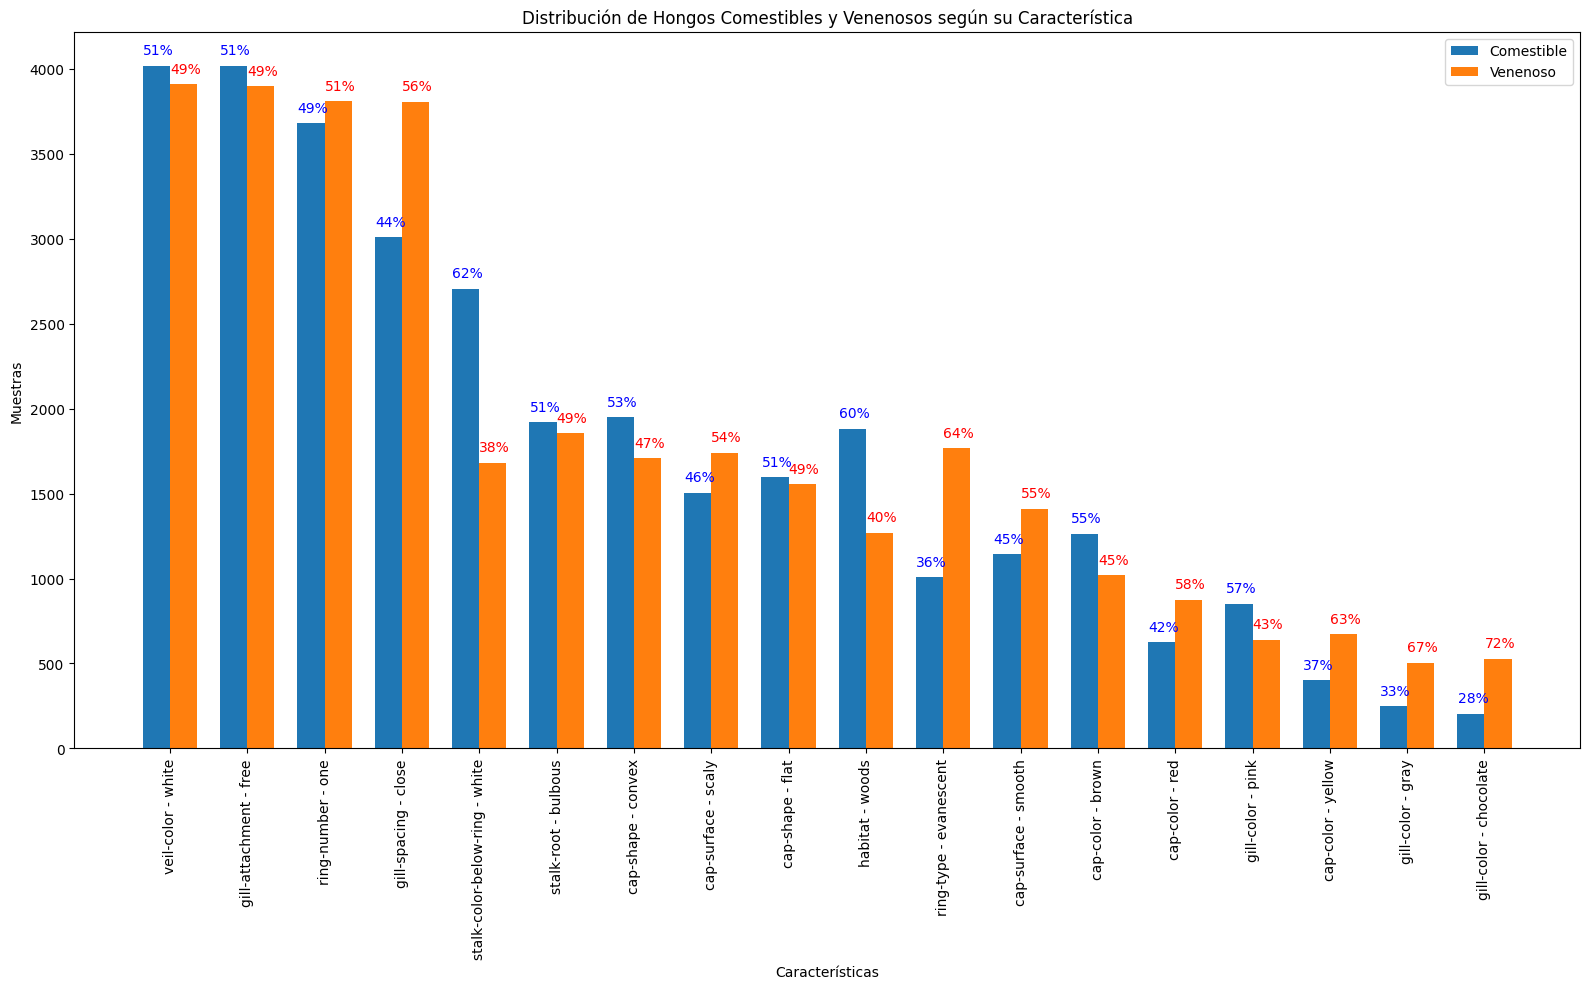

<Figure size 640x480 with 0 Axes>

In [55]:
#@title Gráfico de Barras
# Datos proporcionados
data_ambiguas = {
    'Feature': ['cap-shape', 'cap-shape', 'cap-surface', 'cap-surface', 'cap-color', 'cap-color', 'cap-color', 'gill-attachment', 'gill-color', 'gill-color', 'gill-color', 'gill-spacing', 'stalk-root', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'habitat'],
    'Value': ['convex', 'flat', 'scaly', 'smooth', 'brown', 'red', 'yellow', 'free', 'chocolate', 'gray', 'pink', 'close', 'bulbous', 'white', 'white', 'one', 'evanescent', 'woods'],
    'Edible': [1948, 1596, 1504, 1144, 1264, 624, 400, 4016, 204, 248, 852, 3008, 1920, 2704, 4016, 3680, 1008, 1880],
    'Poisonous': [1708, 1556, 1740, 1412, 1020, 876, 672, 3898, 528, 504, 640, 3804, 1856, 1680, 3908, 3808, 1768, 1268]
}

df_ambiguas = pd.DataFrame(data_ambiguas)

# Ordenar los datos
df_ambiguas['Total'] = df_ambiguas['Edible'] + df_ambiguas['Poisonous']
df_ambiguas = df_ambiguas.sort_values(by='Total', ascending=False)

# Graficar los datos
fig, ax = plt.subplots(figsize=(16, 10))
bar_width = 0.35
index = np.arange(len(df_ambiguas))

bar1 = ax.bar(index, df_ambiguas['Edible'], bar_width, label='Comestible')
bar2 = ax.bar(index + bar_width, df_ambiguas['Poisonous'], bar_width, label='Venenoso')

ax.set_xlabel('Características')
ax.set_ylabel('Muestras')
ax.set_title('Distribución de Hongos Comestibles y Venenosos según su Característica')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_ambiguas['Feature'] + " - " + df_ambiguas['Value'], rotation=90)
ax.legend()

# Agregar porcentajes sobre las barras
for i in range(len(df_ambiguas)):
    total = df_ambiguas['Total'].iloc[i]
    edible = df_ambiguas['Edible'].iloc[i]
    poisonous = df_ambiguas['Poisonous'].iloc[i]
    edible_pct = (edible / total) * 100
    poisonous_pct = (poisonous / total) * 100

    ax.text(index[i] - bar_width / 2 + 0.2, edible + 50, f'{edible_pct:.0f}%', ha='center', va='bottom', fontsize=10, color='blue')
    ax.text(index[i] + bar_width / 2 + 0.2, poisonous + 50, f'{poisonous_pct:.0f}%', ha='center', va='bottom', fontsize=10, color='red')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()




In [56]:
#@title Chequeo de resutlados
# Lista de columnas a verificar
columns_to_check = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population',
    'habitat'
]

# Verificar la distribución de "edible" y "poisonous" para cada categoría en cada columna
for column in columns_to_check:
    print(f"Distribución de 'class' para cada valor en '{column}':")
    distribution = mushroom_data.groupby([column, 'class']).size().unstack(fill_value=0)
    print(distribution)
    print("\n")

# Cheqeuar la distribución de clases
class_distribution = mushroom_data['class'].value_counts()
print(class_distribution)

Distribución de 'class' para cada valor en 'cap-shape':
class      edible  poisonous
cap-shape                   
bell          404         48
conical         0          4
knobbed       228        600
sunken         32          0


Distribución de 'class' para cada valor en 'cap-surface':
class        edible  poisonous
cap-surface                   
fibrous        1560        760
grooves           0          4


Distribución de 'class' para cada valor en 'cap-color':
class      edible  poisonous
cap-color                   
buff           48        120
cinnamon       32         12
gray         1032        808
green          16          0
pink           56         88
purple         16          0
white         720        320


Distribución de 'class' para cada valor en 'bruises':
class    edible  poisonous
bruises                   
bruises    2752        624
no         1456       3292


Distribución de 'class' para cada valor en 'odor':
class     edible  poisonous
odor                  

In [57]:
#@title Aplicar one-hot encoding a las características categóricas
mushroom_data_encoded = pd.get_dummies(mushroom_data, drop_first=True)

# Verificar el resultado
print(mushroom_data_encoded.head())

# Mostrar la cantidad de columnas después de One-Hot Encoding
print("Cantidad de columnas después de One-Hot Encoding:", mushroom_data_encoded.shape[1])


   class_poisonous  cap-shape_conical  cap-shape_knobbed  cap-shape_sunken  \
0             True              False              False             False   
1            False              False              False             False   
2            False              False              False             False   
3             True              False              False             False   
4            False              False              False             False   

   cap-surface_grooves  cap-color_cinnamon  cap-color_gray  cap-color_green  \
0                False               False           False            False   
1                False               False           False            False   
2                False               False           False            False   
3                False               False           False            False   
4                False               False            True            False   

   cap-color_pink  cap-color_purple  ...  population_clu

In [59]:
#@title Revisar la correlación entre las características y la variable objetivo
corr_matrix = mushroom_data_encoded.corr()

# Verificar la correlación entre las características y la variable objetivo
print(corr_matrix['class_poisonous'].sort_values(ascending=False))





class_poisonous                    1.000000
odor_foul                          0.623842
stalk-surface-above-ring_silky     0.587658
stalk-surface-below-ring_silky     0.573524
gill-size_narrow                   0.540024
                                     ...   
spore-print-color_brown           -0.416645
stalk-surface-below-ring_smooth   -0.425444
stalk-surface-above-ring_smooth   -0.491314
ring-type_pendant                 -0.540469
odor_none                         -0.785557
Name: class_poisonous, Length: 77, dtype: float64


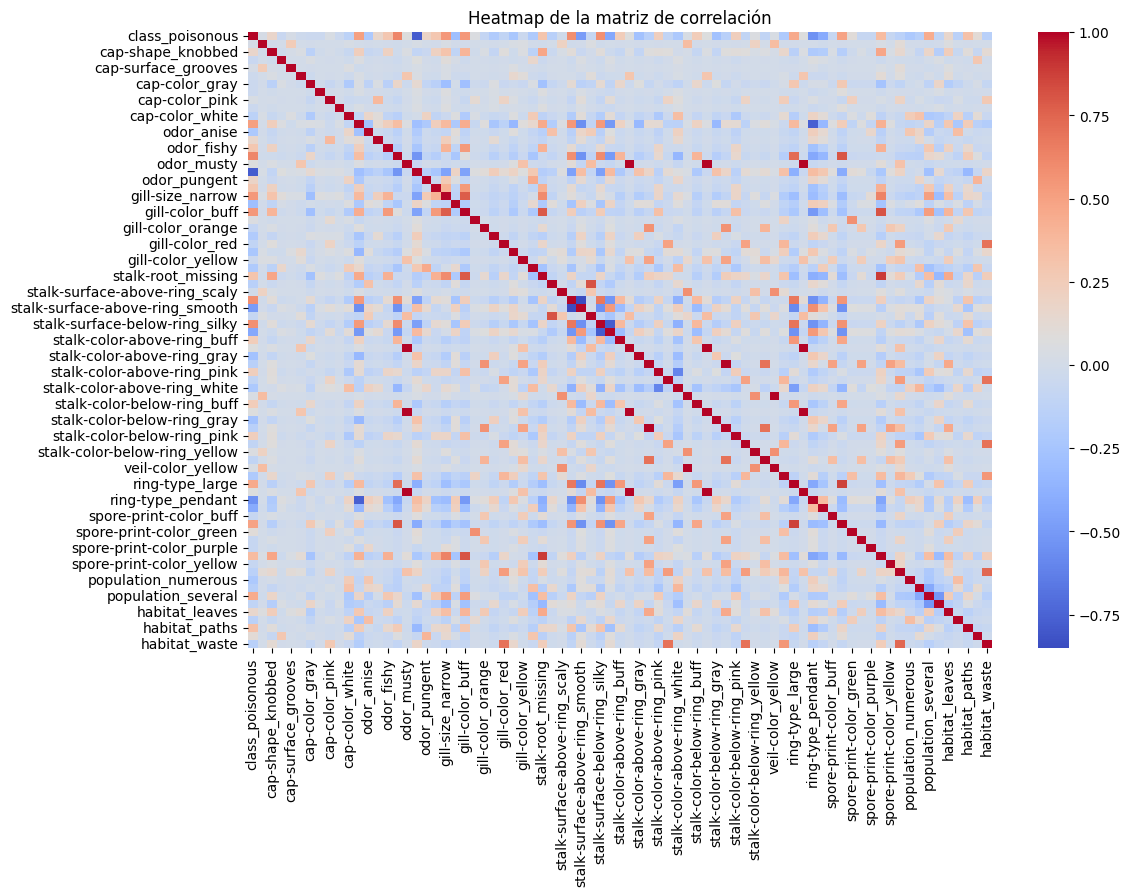

In [60]:
#@title Visualización de la Matriz de Correlación Completa
# Visualizar la matriz de correlación como un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Heatmap de la matriz de correlación')
plt.show()


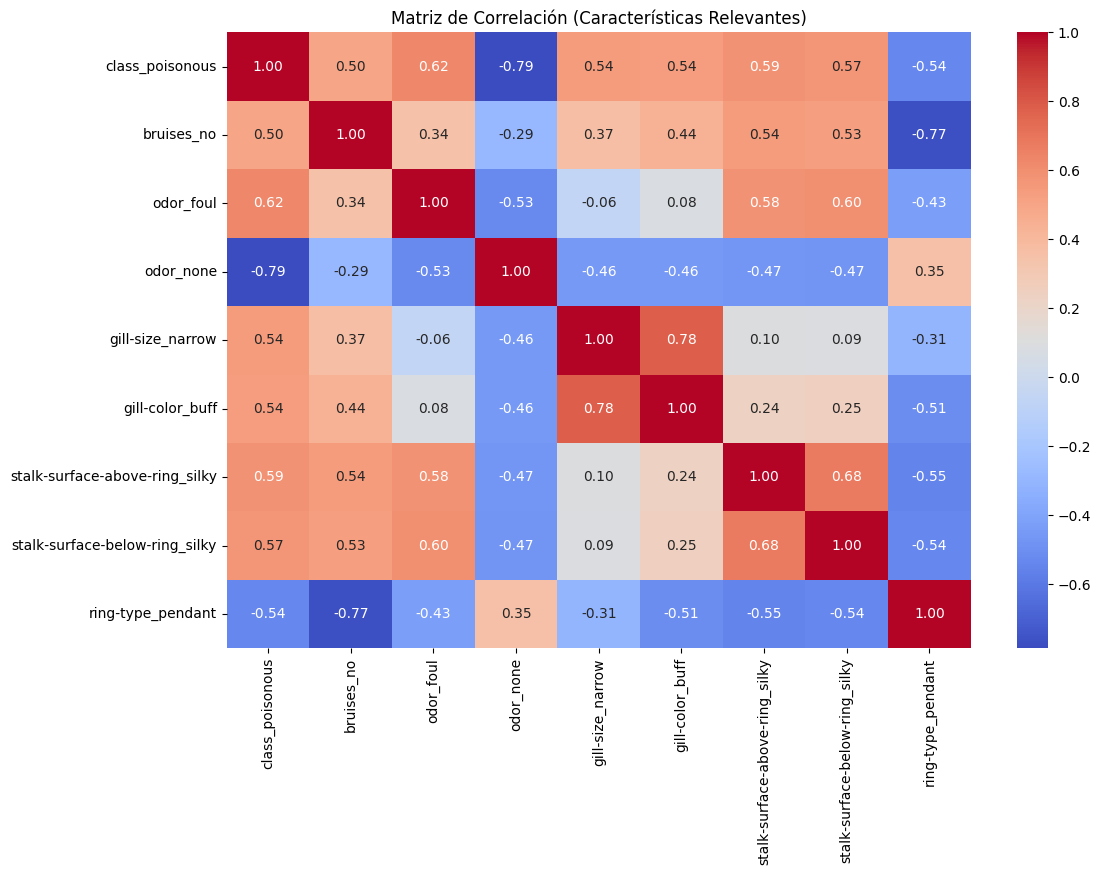

In [62]:
#@title Visualización de la Matriz de Correlación Acotada
# Filtrar características con correlación absoluta mayor a 0.5 con la variable objetivo
corr_target = corr_matrix['class_poisonous'].abs()
relevant_features = corr_target[corr_target > 0.5].index

# Crear una nueva matriz de correlación solo con las características relevantes
filtered_corr_matrix = mushroom_data_encoded[relevant_features].corr()

# Graficar la nueva matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación (Características Relevantes)')
plt.show()

In [63]:
#@title Selección de Características


#Caso 1: Seleccionar las características más correlacionadas con la clase 'poisonous'
selected_features = corr_matrix['class_poisonous'].sort_values(ascending=False).index[1:7].tolist()

print("Caso 1: Características más Correlaciondas")
print(corr_matrix['class_poisonous'].sort_values(ascending=False).index[1:6])

# Caso 2: Seleccionar todas las características (da 100% en los modelos)
#selected_features = mushroom_data_encoded.columns.drop('class').tolist()




Caso 1: Características más Correlaciondas
Index(['odor_foul', 'stalk-surface-above-ring_silky',
       'stalk-surface-below-ring_silky', 'gill-size_narrow',
       'gill-color_buff'],
      dtype='object')


In [64]:
#@title Separar las características y la variable objetivo
X = mushroom_data_encoded[selected_features]
y = mushroom_data_encoded['class_poisonous']

In [41]:
#@title División I: Datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [65]:
#@title División II: Datos en conjuntos de entrenamiento, validación y prueba
# 70% entrenamiento y 30% el resto
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

#El 30% restante en 20% pruebas y 10% validación
# Nota: 20% pruebas es el 2/3 de 30% (lo que resulta en 20%), y 10% validación es el 1/3 de 30%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Verificar las proporciones
print(f"Tamaño de X_train: {len(X_train)}")
print(f"Tamaño de X_test: {len(X_test)}")
print(f"Tamaño de X_val: {len(X_val)}")

Tamaño de X_train: 5686
Tamaño de X_test: 1626
Tamaño de X_val: 812


# **#Modelos que no requieren escalado de características**

In [66]:
#@title Naive Bayes

# No es recomendable escalar las características
# para Naive Bayes Categórico

# Entrenar el modelo de Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_train)
print("Precisión del modelo en Entr:", accuracy_score(y_train, y_pred))
print("Recall del modelo: en Entr", recall_score(y_train, y_pred))
print("F1-Score del modelo en Entr:", f1_score(y_train, y_pred))
print("Reporte de clasificación en Entr:\n", classification_report(y_train, y_pred))

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Recall del modelo:", recall_score(y_test, y_pred))
print("F1-Score del modelo:", f1_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = model.predict(X_val)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Recall del modelo en validación:", recall_score(y_val, y_val_pred))
print("F1-Score del modelo en validación:", f1_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

print()
print("Parametros Usados")
print(model.get_params())



Precisión del modelo en Entr: 0.9104818853323954
Recall del modelo: en Entr 0.8665447897623401
F1-Score del modelo en Entr: 0.9030291484092209
Reporte de clasificación en Entr:
               precision    recall  f1-score   support

       False       0.88      0.95      0.92      2951
        True       0.94      0.87      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.91      0.91      0.91      5686
weighted avg       0.91      0.91      0.91      5686

Precisión del modelo: 0.8985239852398524
Recall del modelo: 0.8573264781491002
F1-Score del modelo: 0.8899266177451634
Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.88      0.94      0.91       848
        True       0.93      0.86      0.89       778

    accuracy                           0.90      1626
   macro avg       0.90      0.90      0.90      1626
weighted avg       0.90      0.90      0.90      1626

Precisión del modelo e

In [67]:
#@title Random Forest


# No es recomendable escalar las características
# para Random Forest

# Entrenar el modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print("Precisión del modelo en Entr:", accuracy_score(y_train, y_pred))
print("Recall del modelo: en Entr", recall_score(y_train, y_pred))
print("F1-Score del modelo en Entr:", f1_score(y_train, y_pred))
print("Reporte de clasificación en Entr:\n", classification_report(y_train, y_pred))


# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)
print("Precisión del modelo en Test:", accuracy_score(y_test, y_pred))
print("Recall del modelo: en Test", recall_score(y_test, y_pred))
print("F1-Score del modelo en Test:", f1_score(y_test, y_pred))
print("Reporte de clasificación en Test:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = model.predict(X_val)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Recall del modelo en validación:", recall_score(y_val, y_val_pred))
print("F1-Score del modelo en validación:", f1_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))


print()
print("Parametros Usados")
print(model.get_params())

Precisión del modelo en Entr: 0.9523390784382695
Recall del modelo: en Entr 0.9714808043875686
F1-Score del modelo en Entr: 0.9514771709937332
Reporte de clasificación en Entr:
               precision    recall  f1-score   support

       False       0.97      0.93      0.95      2951
        True       0.93      0.97      0.95      2735

    accuracy                           0.95      5686
   macro avg       0.95      0.95      0.95      5686
weighted avg       0.95      0.95      0.95      5686

Precisión del modelo en Test: 0.9544895448954489
Recall del modelo: en Test 0.9768637532133676
F1-Score del modelo en Test: 0.9535759096612295
Reporte de clasificación en Test:
               precision    recall  f1-score   support

       False       0.98      0.93      0.96       848
        True       0.93      0.98      0.95       778

    accuracy                           0.95      1626
   macro avg       0.95      0.96      0.95      1626
weighted avg       0.96      0.95      0.95  

# **#Modelos que requieren escalado de características**

In [68]:
#@title Escalado de las características
# Guardar los nombres de las columnas antes de escalar
feature_names = X_train.columns

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Para validacion
X_val_scaled = scaler.transform(X_val)



In [69]:
#@title Regresion Logística

#EDIT si selecciono todas las carac da 100%
# Entrenar el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_train_scaled)
print("Precisión del modelo en Entr:", accuracy_score(y_train, y_pred))
print("Recall del modelo: en Entr", recall_score(y_train, y_pred))
print("F1-Score del modelo en Entr:", f1_score(y_train, y_pred))
print("Reporte de clasificación en Entr:\n", classification_report(y_train, y_pred))

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test_scaled)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Recall del modelo:", recall_score(y_test, y_pred))
print("F1-Score del modelo:", f1_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = model.predict(X_val_scaled)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Recall del modelo en validación:", recall_score(y_val, y_val_pred))
print("F1-Score del modelo en validación:", f1_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

print()
print("Parametros Usados")
print(model.get_params())


Precisión del modelo en Entr: 0.9523390784382695
Recall del modelo: en Entr 0.9714808043875686
F1-Score del modelo en Entr: 0.9514771709937332
Reporte de clasificación en Entr:
               precision    recall  f1-score   support

       False       0.97      0.93      0.95      2951
        True       0.93      0.97      0.95      2735

    accuracy                           0.95      5686
   macro avg       0.95      0.95      0.95      5686
weighted avg       0.95      0.95      0.95      5686

Precisión del modelo: 0.9544895448954489
Recall del modelo: 0.9768637532133676
F1-Score del modelo: 0.9535759096612295
Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.98      0.93      0.96       848
        True       0.93      0.98      0.95       778

    accuracy                           0.95      1626
   macro avg       0.95      0.96      0.95      1626
weighted avg       0.96      0.95      0.95      1626

Precisión del modelo e

In [70]:
#@title KNN

# Entrenar el modelo de KNN
model = KNeighborsClassifier()  # Puedes ajustar n_neighbors según sea necesario
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_train_scaled)
print("Precisión del modelo en Entr:", accuracy_score(y_train, y_pred))
print("Recall del modelo: en Entr", recall_score(y_train, y_pred))
print("F1-Score del modelo en Entr:", f1_score(y_train, y_pred))
print("Reporte de clasificación en Entr:\n", classification_report(y_train, y_pred))


# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test_scaled)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Recall del modelo:", recall_score(y_test, y_pred))
print("F1-Score del modelo:", f1_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


# Evaluar el modelo en el conjunto de validación
y_val_pred = model.predict(X_val_scaled)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Recall del modelo en validación:", recall_score(y_val, y_val_pred))
print("F1-Score del modelo en validación:", f1_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

print()
print("Parametros Usados")
print(model.get_params())

Precisión del modelo en Entr: 0.9474147027787548
Recall del modelo: en Entr 0.9297989031078611
F1-Score del modelo en Entr: 0.9444753946146704
Reporte de clasificación en Entr:
               precision    recall  f1-score   support

       False       0.94      0.96      0.95      2951
        True       0.96      0.93      0.94      2735

    accuracy                           0.95      5686
   macro avg       0.95      0.95      0.95      5686
weighted avg       0.95      0.95      0.95      5686

Precisión del modelo: 0.942189421894219
Recall del modelo: 0.9383033419023136
F1-Score del modelo: 0.9395109395109394
Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.94      0.95      0.94       848
        True       0.94      0.94      0.94       778

    accuracy                           0.94      1626
   macro avg       0.94      0.94      0.94      1626
weighted avg       0.94      0.94      0.94      1626

Precisión del modelo en

#Optimización mediante RandomizedSearchCV

In [71]:
#@title OPTIMIZACION: Random Forest

param_distribs = {
        'n_estimators': randint(low=50, high=500),
        'max_depth': randint(low=8, high=50),
        'min_samples_split':randint(low=2, high=10),
        'min_samples_leaf': randint(low=1, high=4)
    }

rnd_clf = RandomForestClassifier(n_jobs=-1)

rnd_search = RandomizedSearchCV(rnd_clf, param_distributions=param_distribs,
                                n_iter=4, cv=30, scoring='accuracy')

rnd_search.fit(X_train, y_train)

#Almacenar los resultados en variables para posterior analisis
best_params_rf = rnd_search.best_params_
best_score_rf = rnd_search.best_score_
best_estimator_rf = rnd_search.best_estimator_



KeyboardInterrupt: 

In [72]:
#@title OPTIMIZACION: CategoricalNB

param_distribs = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
}

# Inicializa modelo CategoricalNB
cat_nb = CategoricalNB()

# Realiza Randomized Search
rnd_search = RandomizedSearchCV(cat_nb, param_distributions=param_distribs,
                                n_iter=4, cv=5, scoring='accuracy',
                                random_state=42, n_jobs=-1)

rnd_search.fit(X_train, y_train)

#Almacenar los resultados en variables para posterior analisis
best_params_nb = rnd_search.best_params_
best_score_nb = rnd_search.best_score_
best_estimator_nb = rnd_search.best_estimator_

In [73]:
#@title OPTIMIZACION: KNN

# Parámetros ajustables de KNeighborsClassifier
param_distribs = {
    'n_neighbors': randint(low=3, high=31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]                             # Minkowski distance
}


knn = KNeighborsClassifier()


rnd_search = RandomizedSearchCV(knn, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy',
                                random_state=42, n_jobs=-1)


rnd_search.fit(X_train_scaled, y_train)

#Almacenar los resultados en variables para posterior analisis
best_params_knn = rnd_search.best_params_
best_score_knn = rnd_search.best_score_
best_estimator_knn = rnd_search.best_estimator_

In [74]:
#@title OPTIMIZACION: Reg Log

from scipy.stats import uniform
# Parameteros
param_distribs = {
    'C': uniform(loc=0.01, scale=99.99),  # Distribución uniforme entre 0.01 y 100
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
    }


logreg = LogisticRegression(solver='saga', max_iter=1000, random_state=42)
# Nota: 'saga' solver soporta  l1 y l2

rnd_search = RandomizedSearchCV(logreg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy',
                                random_state=42, n_jobs=-1)


rnd_search.fit(X_train_scaled, y_train)

#Almacenar los resultados en variables para posterior analisis
best_params_reg = rnd_search.best_params_
best_score_reg = rnd_search.best_score_
best_estimator_reg = rnd_search.best_estimator_

In [75]:
#@title Acceso a los resultados

#Nota, usando más cv se mejora marginalmente los decimales
print("Random Forest - Resultados de Optimización:")
print(best_params_rf)
print("Random Forest - Accuracy:")
print(best_score_rf)
print("Random Forest - Mejores hiperparámetros:")
print(best_estimator_rf)

print("")
print("CategoricalNB - Resultados de Optimización:")
print(best_params_nb)
print("CategoricalNB - Accuracy:")
print(best_score_nb)
print("CategoricalNB - Mejor hiperparámetros:")
print(best_estimator_nb)

print("")
print("KNN - Resultados de Optimización:")
print(best_params_knn)
print("KNN - Accuracy:")
print(best_score_knn)
print("KNN - Mejor hiperparámetros:")
print(best_estimator_knn)

print("")
print("Reg Log - Resultados de Optimización:")
print(best_params_reg)
print("Reg Log - Accuracy:")
print(best_score_reg)
print("Reg Log - Mejor hiperparámetros:")
print(best_estimator_reg)


Random Forest - Resultados de Optimización:


NameError: name 'best_params_rf' is not defined

#Optimización Usando GridSearchCV

In [76]:
#@title Naive Bayes con GridSearchCV y y Stratified Cross-Validation

# No es recomendable escalar las características
# para Naive Bayes Categórico

# Parámetros a ajustar
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Smoothing parameter
}

# Inicializar CategoricalNB
cat_nb = CategoricalNB()

# Inicializar GridSearchCV con validación cruzada estratificada
grid_search = GridSearchCV(cat_nb, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='accuracy', n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor estimador
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Mejores parámetros:", best_params)

# Evaluar el mejor modelo en el conjunto de prueba (si tienes uno separado)
y_pred = best_model.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Recall del modelo:", recall_score(y_test, y_pred))
print("F1-Score del modelo:", f1_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = best_model.predict(X_val)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Recall del modelo en validación:", recall_score(y_val, y_val_pred))
print("F1-Score del modelo en validación:", f1_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

Mejores parámetros: {'alpha': 0.01}
Precisión del modelo: 0.8985239852398524
Recall del modelo: 0.8573264781491002
F1-Score del modelo: 0.8899266177451634
Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.88      0.94      0.91       848
        True       0.93      0.86      0.89       778

    accuracy                           0.90      1626
   macro avg       0.90      0.90      0.90      1626
weighted avg       0.90      0.90      0.90      1626

Precisión del modelo en validación: 0.9039408866995073
Recall del modelo en validación: 0.8511166253101737
F1-Score del modelo en validación: 0.8979057591623038
Reporte de clasificación en validación:
               precision    recall  f1-score   support

       False       0.87      0.96      0.91       409
        True       0.95      0.85      0.90       403

    accuracy                           0.90       812
   macro avg       0.91      0.90      0.90       812
weighted avg     

In [78]:
#@title Random Forest con GridSearchCV y Stratified Cross-Validation

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Parámetros a ajustar para RandomForest
param_grid = {
    'n_estimators': [50, 100, 200, 250, 300, 350, 400, 450, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Inicializar GridSearchCV con validación cruzada estratificada
grid_search = GridSearchCV(rf_classifier, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='accuracy', n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor estimador
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Mejores parámetros:", best_params)

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = best_model.predict(X_val)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

KeyboardInterrupt: 

In [79]:
#@title KNN con GridSearchCV y Stratified Cross-Validation

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Parámetros a ajustar para KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

# Inicializar KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Inicializar StratifiedKFold para validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar GridSearchCV con StratifiedKFold
grid_search = GridSearchCV(knn_classifier, param_grid, cv=skf,
                           scoring='accuracy', n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento escalados
grid_search.fit(X_train_scaled, y_train)  # Usar X_train_scaled

# Obtener los mejores parámetros y el mejor estimador
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Mejores parámetros:", best_params)

# Evaluar el mejor modelo en el conjunto de prueba (asumiendo que X_test_scaled también está disponible)
y_pred = best_model.predict(X_test_scaled)  # Usar X_test_scaled
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = best_model.predict(X_val_scaled)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

Mejores parámetros: {'n_neighbors': 23, 'p': 1, 'weights': 'uniform'}
Precisión del modelo: 0.9526445264452644
Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.94      0.97      0.96       848
        True       0.97      0.93      0.95       778

    accuracy                           0.95      1626
   macro avg       0.95      0.95      0.95      1626
weighted avg       0.95      0.95      0.95      1626

Precisión del modelo en validación: 0.9433497536945813
Reporte de clasificación en validación:
               precision    recall  f1-score   support

       False       0.92      0.97      0.95       409
        True       0.97      0.91      0.94       403

    accuracy                           0.94       812
   macro avg       0.95      0.94      0.94       812
weighted avg       0.94      0.94      0.94       812



In [80]:
#@title Regresión Logística con GridSearchCV y Stratified Cross-Validation

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Parámetros a ajustar para Regresión Logística
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']  # Solvers que soportan ambas penalizaciones
}

# Inicializar LogisticRegression
logreg_classifier = LogisticRegression(random_state=42, max_iter=1000)  # Aumentar max_iter si es necesario

# Inicializar StratifiedKFold para validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar GridSearchCV con StratifiedKFold
grid_search = GridSearchCV(logreg_classifier, param_grid, cv=skf,
                           scoring='accuracy', n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento escalados
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores parámetros y el mejor estimador
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Mejores parámetros:", best_params)

# Evaluar el mejor modelo en el conjunto de prueba (usando X_test escalado)
y_pred = best_model.predict(X_test_scaled)

# Crear un DataFrame con los resultados de la predicción
y_pred_df = pd.DataFrame(y_pred, columns=['prediction'])

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Recall del modelo:", recall_score(y_test, y_pred))
print("F1-Score del modelo:", f1_score(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = best_model.predict(X_val_scaled)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Recall del modelo en validación:", recall_score(y_val, y_val_pred))
print("F1-Score del modelo en validación:", f1_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

Mejores parámetros: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Precisión del modelo: 0.9544895448954489
Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.98      0.93      0.96       848
        True       0.93      0.98      0.95       778

    accuracy                           0.95      1626
   macro avg       0.95      0.96      0.95      1626
weighted avg       0.96      0.95      0.95      1626

Precisión del modelo: 0.9544895448954489
Recall del modelo: 0.9768637532133676
F1-Score del modelo: 0.9535759096612295
Precisión del modelo en validación: 0.937192118226601
Recall del modelo en validación: 0.9702233250620348
F1-Score del modelo en validación: 0.9387755102040817
Reporte de clasificación en validación:
               precision    recall  f1-score   support

       False       0.97      0.90      0.94       409
        True       0.91      0.97      0.94       403

    accuracy                           0.94      

# **Métricas Usando Hiperparámetros Optimizados**

In [81]:
#@title Naive Bayes Optimizado

# Definir los mejores parámetros
#best_params = {'alpha': 10}  #RSCV
best_params = {'alpha': 0.1}  #GridSearchCV

# Crear el modelo de Naive Bayes
model = CategoricalNB(**best_params)

model.fit(X_train, y_train)


y_pred = model.predict(X_train)
print("Precisión del modelo en Entr:", accuracy_score(y_train, y_pred))
print("Recall del modelo: en Entr", recall_score(y_train, y_pred))
print("F1-Score del modelo en Entr:", f1_score(y_train, y_pred))
print("Reporte de clasificación en Entr:\n", classification_report(y_train, y_pred))

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Recall del modelo:", recall_score(y_test, y_pred))
print("F1-Score del modelo:", f1_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = model.predict(X_val)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Recall del modelo en validación:", recall_score(y_val, y_val_pred))
print("F1-Score del modelo en validación:", f1_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

print()
print("Parametros Usados")
print(model.get_params())


Precisión del modelo en Entr: 0.9104818853323954
Recall del modelo: en Entr 0.8665447897623401
F1-Score del modelo en Entr: 0.9030291484092209
Reporte de clasificación en Entr:
               precision    recall  f1-score   support

       False       0.88      0.95      0.92      2951
        True       0.94      0.87      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.91      0.91      0.91      5686
weighted avg       0.91      0.91      0.91      5686

Precisión del modelo: 0.8985239852398524
Recall del modelo: 0.8573264781491002
F1-Score del modelo: 0.8899266177451634
Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.88      0.94      0.91       848
        True       0.93      0.86      0.89       778

    accuracy                           0.90      1626
   macro avg       0.90      0.90      0.90      1626
weighted avg       0.90      0.90      0.90      1626

Precisión del modelo e

In [82]:
#@title Random Forest Optimizado

# Definir los mejores parámetros
best_params_rf = {
    'n_estimators': 409,
    'max_depth': 14,
    'min_samples_split': 7,
    'min_samples_leaf': 2
}

#GridSearchCV
#best_params_rf = { 'n_estimators': 50, 'max_depth': None , 'min_samples_split': 2,'min_samples_leaf': 1 }

# Crear el modelo de Random Forest
model = RandomForestClassifier(**best_params_rf, random_state=42)

model.fit(X_train, y_train)


y_pred = model.predict(X_train)
print("Precisión del modelo en Entr:", accuracy_score(y_train, y_pred))
print("Recall del modelo: en Entr", recall_score(y_train, y_pred))
print("F1-Score del modelo en Entr:", f1_score(y_train, y_pred))
print("Reporte de clasificación en Entr:\n", classification_report(y_train, y_pred))

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Recall del modelo:", recall_score(y_test, y_pred))
print("F1-Score del modelo:", f1_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = model.predict(X_val)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Recall del modelo en validación:", recall_score(y_val, y_val_pred))
print("F1-Score del modelo en validación:", f1_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

print()
print("Parametros Usados")
print(model.get_params())

Precisión del modelo en Entr: 0.9523390784382695
Recall del modelo: en Entr 0.9714808043875686
F1-Score del modelo en Entr: 0.9514771709937332
Reporte de clasificación en Entr:
               precision    recall  f1-score   support

       False       0.97      0.93      0.95      2951
        True       0.93      0.97      0.95      2735

    accuracy                           0.95      5686
   macro avg       0.95      0.95      0.95      5686
weighted avg       0.95      0.95      0.95      5686

Precisión del modelo: 0.9544895448954489
Recall del modelo: 0.9768637532133676
F1-Score del modelo: 0.9535759096612295
Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.98      0.93      0.96       848
        True       0.93      0.98      0.95       778

    accuracy                           0.95      1626
   macro avg       0.95      0.96      0.95      1626
weighted avg       0.96      0.95      0.95      1626

Precisión del modelo e

In [83]:
#@title KNN Optimizado

# Definir los mejores parámetros
best_params_knn = {
    'n_neighbors': 23,
    'weights': 'uniform',
    'p': 1
}
#GridSCV (edit, encontraron los mismos parametros)
#best_params_knn = {    'n_neighbors': 3,    'weights': 'uniform',    'p': 1}
# Crear el modelo de KNN
model = KNeighborsClassifier(**best_params_knn)

model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_train_scaled)
print("Precisión del modelo en Entr:", accuracy_score(y_train, y_pred))
print("Recall del modelo: en Entr", recall_score(y_train, y_pred))
print("F1-Score del modelo en Entr:", f1_score(y_train, y_pred))
print("Reporte de clasificación en Entr:\n", classification_report(y_train, y_pred))

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test_scaled)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Recall del modelo:", recall_score(y_test, y_pred))
print("F1-Score del modelo:", f1_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = model.predict(X_val_scaled)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Recall del modelo en validación:", recall_score(y_val, y_val_pred))
print("F1-Score del modelo en validación:", f1_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

print()
print("Parametros Usados")
print(model.get_params())

Precisión del modelo en Entr: 0.9505803728455856
Recall del modelo: en Entr 0.9191956124314442
F1-Score del modelo en Entr: 0.9470710114899228
Reporte de clasificación en Entr:
               precision    recall  f1-score   support

       False       0.93      0.98      0.95      2951
        True       0.98      0.92      0.95      2735

    accuracy                           0.95      5686
   macro avg       0.95      0.95      0.95      5686
weighted avg       0.95      0.95      0.95      5686

Precisión del modelo: 0.9526445264452644
Recall del modelo: 0.9331619537275064
F1-Score del modelo: 0.9496402877697843
Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.94      0.97      0.96       848
        True       0.97      0.93      0.95       778

    accuracy                           0.95      1626
   macro avg       0.95      0.95      0.95      1626
weighted avg       0.95      0.95      0.95      1626

Precisión del modelo e

In [84]:
#@title Regresión Logística Optimizada

# Definir los mejores parámetros
#best_params_lr = {
 #   'C': 37.46026648354777,
  #  'penalty': 'l2',
   # 'solver': 'liblinear'
#}  # Reemplaza con los parámetros que hayas optimizado

#GridSCV
best_params_lr = {    'C': 0.01,    'penalty': 'l1',    'solver': 'saga'}


# Crear el modelo de Regresión Logística
model = LogisticRegression(**best_params_lr, random_state=42)

model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_train_scaled)
print("Precisión del modelo en Entr:", accuracy_score(y_train, y_pred))
print("Recall del modelo: en Entr", recall_score(y_train, y_pred))
print("F1-Score del modelo en Entr:", f1_score(y_train, y_pred))
print("Reporte de clasificación en Entr:\n", classification_report(y_train, y_pred))

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test_scaled)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Recall del modelo:", recall_score(y_test, y_pred))
print("F1-Score del modelo:", f1_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar el modelo en el conjunto de validación
y_val_pred = model.predict(X_val_scaled)
print("Precisión del modelo en validación:", accuracy_score(y_val, y_val_pred))
print("Recall del modelo en validación:", recall_score(y_val, y_val_pred))
print("F1-Score del modelo en validación:", f1_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

print()
print("Parametros Usados")
print(model.get_params())

Precisión del modelo en Entr: 0.9523390784382695
Recall del modelo: en Entr 0.9714808043875686
F1-Score del modelo en Entr: 0.9514771709937332
Reporte de clasificación en Entr:
               precision    recall  f1-score   support

       False       0.97      0.93      0.95      2951
        True       0.93      0.97      0.95      2735

    accuracy                           0.95      5686
   macro avg       0.95      0.95      0.95      5686
weighted avg       0.95      0.95      0.95      5686

Precisión del modelo: 0.9544895448954489
Recall del modelo: 0.9768637532133676
F1-Score del modelo: 0.9535759096612295
Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.98      0.93      0.96       848
        True       0.93      0.98      0.95       778

    accuracy                           0.95      1626
   macro avg       0.95      0.96      0.95      1626
weighted avg       0.96      0.95      0.95      1626

Precisión del modelo e

# **Validación Cruzada Estratificada: StratifiedKFold**

In [85]:
#@title Validación Cruzadad Estratificada: Naive Bayes opt vs normal
# Definir los mejores parámetros

#best_params = {'alpha': 10}  # RSCV
best_params = {'alpha': 0.1}  # GSCV

# Crear el modelo de Naive Bayes
model_nb_opt = CategoricalNB(**best_params)

# Validación cruzada estratificada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results_nb_opt = cross_validate(model_nb_opt, X_train, y_train, cv=skf, scoring=['accuracy', 'recall', 'f1'], return_train_score=False)

print("***************************OPTIMIZADO***************************")
print("Puntuaciones de validación cruzada:")
print("Precisión:", cv_results_nb_opt['test_accuracy'])
print("Recall:", cv_results_nb_opt['test_recall'])
print("F1 Score:", cv_results_nb_opt['test_f1'])
print("")
print("Precisión media de validación cruzada:", cv_results_nb_opt['test_accuracy'].mean())
print("Recall medio de validación cruzada:", cv_results_nb_opt['test_recall'].mean())
print("F1 Score medio de validación cruzada:", cv_results_nb_opt['test_f1'].mean())
print("")
print(model_nb_opt.get_params())
print("")

print("***************************SIN OPTIMIZAR***************************")
# Crear el modelo de Naive Bayes
model_nb = CategoricalNB()

# Validación cruzada estratificada
cv_results_nb = cross_validate(model_nb, X_train, y_train, cv=skf, scoring=['accuracy', 'recall', 'f1'], return_train_score=False)

print("Puntuaciones de validación cruzada:")
print("Precisión:", cv_results_nb['test_accuracy'])
print("Recall:", cv_results_nb['test_recall'])
print("F1 Score:", cv_results_nb['test_f1'])
print("")
print("Precisión media de validación cruzada:", cv_results_nb['test_accuracy'].mean())
print("Recall medio de validación cruzada:", cv_results_nb['test_recall'].mean())
print("F1 Score medio de validación cruzada:", cv_results_nb['test_f1'].mean())
print("")
print(model_nb.get_params())


***************************OPTIMIZADO***************************
Puntuaciones de validación cruzada:
Precisión: [0.91036907 0.91388401 0.89279438 0.90509666 0.90685413 0.91036907
 0.9084507  0.90316901 0.92605634 0.92077465]
Recall: [0.87591241 0.87956204 0.88686131 0.84306569 0.92335766 0.91208791
 0.92673993 0.86446886 0.93040293 0.93406593]
F1 Score: [0.9039548  0.90772128 0.88848263 0.89534884 0.90518784 0.90710383
 0.90681004 0.89563567 0.92363636 0.91891892]

Precisión media de validación cruzada: 0.909781801529741
Recall medio de validación cruzada: 0.8976524691853159
F1 Score medio de validación cruzada: 0.9052800205191829

{'alpha': 0.1, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'min_categories': None}

***************************SIN OPTIMIZAR***************************
Puntuaciones de validación cruzada:
Precisión: [0.91036907 0.91388401 0.90158172 0.90509666 0.90685413 0.91036907
 0.9084507  0.90316901 0.92605634 0.92077465]
Recall: [0.87591241 0.8795620

In [86]:
#@title Validación Cruzadad Estratificada: Random Forest opt vs normal
# Definir los mejores parámetros
#best_params_rf = {'n_estimators': 409, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 2, 'random_state': 42}
best_params_rf = {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'random_state': 42}


# Crear el modelo de Random Forest
model_rf_opt = RandomForestClassifier(**best_params_rf)

# Validación cruzada estratificada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results_rf_opt = cross_validate(model_rf_opt, X_train, y_train, cv=skf, scoring=['accuracy', 'recall', 'f1'], return_train_score=False)

print("***************************OPTIMIZADO***************************")
print("Puntuaciones de validación cruzada:")
print("Precisión:", cv_results_rf_opt['test_accuracy'])
print("Recall:", cv_results_rf_opt['test_recall'])
print("F1 Score:", cv_results_rf_opt['test_f1'])
print("")
print("Precisión media de validación cruzada:", cv_results_rf_opt['test_accuracy'].mean())
print("Recall medio de validación cruzada:", cv_results_rf_opt['test_recall'].mean())
print("F1 Score medio de validación cruzada:", cv_results_rf_opt['test_f1'].mean())
print("")
print(model_rf_opt.get_params())
print("")

print("***************************SIN OPTIMIZAR***************************")
# Crear el modelo de Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Validación cruzada estratificada
cv_results_rf = cross_validate(model_rf, X_train, y_train, cv=skf, scoring=['accuracy', 'recall', 'f1'], return_train_score=False)

print("Puntuaciones de validación cruzada:")
print("Precisión:", cv_results_rf['test_accuracy'])
print("Recall:", cv_results_rf['test_recall'])
print("F1 Score:", cv_results_rf['test_f1'])
print("")
print("Precisión media de validación cruzada:", cv_results_rf['test_accuracy'].mean())
print("Recall medio de validación cruzada:", cv_results_rf['test_recall'].mean())
print("F1 Score medio de validación cruzada:", cv_results_rf['test_f1'].mean())
print("")
print(model_rf.get_params())


***************************OPTIMIZADO***************************
Puntuaciones de validación cruzada:
Precisión: [0.95957821 0.95957821 0.94551845 0.95957821 0.94727592 0.94903339
 0.94014085 0.96126761 0.9471831  0.95422535]
Recall: [0.97810219 0.97080292 0.95620438 0.97810219 0.97445255 0.96336996
 0.96703297 0.97069597 0.97435897 0.98168498]
F1 Score: [0.9588551  0.95855856 0.94414414 0.9588551  0.94680851 0.94774775
 0.93950178 0.96014493 0.94661922 0.95373665]

Precisión media de validación cruzada: 0.9523379291566624
Recall medio de validación cruzada: 0.9714807090719499
F1 Score medio de validación cruzada: 0.9514971736650496

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'ver

In [87]:
#@title Validación Cruzada Estratificada: Regresión Logística opt vs normal
# Definir los mejores parámetros
#best_params_lr = {'C': 37.46026648354777, 'penalty': 'l2', 'solver': 'liblinear', 'random_state': 42}
best_params_lr = {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear', 'random_state': 42}


# Crear el modelo de Regresión Logística
model_lr_opt = LogisticRegression(**best_params_lr)

# Validación cruzada estratificada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results_lr_opt = cross_validate(model_lr_opt, X_train_scaled, y_train, cv=skf, scoring=['accuracy', 'recall', 'f1'], return_train_score=False)

print("***************************OPTIMIZADO***************************")
print("Puntuaciones de validación cruzada:")
print("Precisión:", cv_results_lr_opt['test_accuracy'])
print("Recall:", cv_results_lr_opt['test_recall'])
print("F1 Score:", cv_results_lr_opt['test_f1'])
print("")
print("Precisión media de validación cruzada:", cv_results_lr_opt['test_accuracy'].mean())
print("Recall medio de validación cruzada:", cv_results_lr_opt['test_recall'].mean())
print("F1 Score medio de validación cruzada:", cv_results_lr_opt['test_f1'].mean())
print("")
print(model_lr_opt.get_params())
print("")

print("***************************SIN OPTIMIZAR***************************")
# Crear el modelo de Regresión Logística
model_lr = LogisticRegression()

# Validación cruzada estratificada
cv_results_lr = cross_validate(model_lr, X_train_scaled, y_train, cv=skf, scoring=['accuracy', 'recall', 'f1'], return_train_score=False)

print("Puntuaciones de validación cruzada:")
print("Precisión:", cv_results_lr['test_accuracy'])
print("Recall:", cv_results_lr['test_recall'])
print("F1 Score:", cv_results_lr['test_f1'])
print("")
print("Precisión media de validación cruzada:", cv_results_lr['test_accuracy'].mean())
print("Recall medio de validación cruzada:", cv_results_lr['test_recall'].mean())
print("F1 Score medio de validación cruzada:", cv_results_lr['test_f1'].mean())
print("")
print(model_lr.get_params())


***************************OPTIMIZADO***************************
Puntuaciones de validación cruzada:
Precisión: [0.95957821 0.95957821 0.94551845 0.95957821 0.94727592 0.94903339
 0.94014085 0.96126761 0.9471831  0.95422535]
Recall: [0.97810219 0.97080292 0.95620438 0.97810219 0.97445255 0.96336996
 0.96703297 0.97069597 0.97435897 0.98168498]
F1 Score: [0.9588551  0.95855856 0.94414414 0.9588551  0.94680851 0.94774775
 0.93950178 0.96014493 0.94661922 0.95373665]

Precisión media de validación cruzada: 0.9523379291566624
Recall medio de validación cruzada: 0.9714807090719499
F1 Score medio de validación cruzada: 0.9514971736650496

{'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

***************************SIN OPTIMIZAR***************************
Puntuacion

In [88]:
#@title Validación Cruzada Estratificada: KNN opt vs normal
# Definir los mejores parámetros

best_params_knn = {'n_neighbors': 23, 'p': 1, 'weights': 'uniform'}

#ambos algoritmos encontraron los mismos hiperparámetros


# Crear el modelo de KNN
model_knn_opt = KNeighborsClassifier(**best_params_knn)

# Validación cruzada estratificada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results_knn_opt = cross_validate(model_knn_opt, X_train_scaled, y_train, cv=skf, scoring=['accuracy', 'recall', 'f1'], return_train_score=False)

print("***************************OPTIMIZADO***************************")
print("Puntuaciones de validación cruzada:")
print("Precisión:", cv_results_knn_opt['test_accuracy'])
print("Recall:", cv_results_knn_opt['test_recall'])
print("F1 Score:", cv_results_knn_opt['test_f1'])
print("")
print("Precisión media de validación cruzada:", cv_results_knn_opt['test_accuracy'].mean())
print("Recall medio de validación cruzada:", cv_results_knn_opt['test_recall'].mean())
print("F1 Score medio de validación cruzada:", cv_results_knn_opt['test_f1'].mean())
print("")
print(model_knn_opt.get_params())
print("")

print("***************************SIN OPTIMIZAR***************************")
# Crear el modelo de KNN
model_knn = KNeighborsClassifier()

# Validación cruzada estratificada
cv_results_knn = cross_validate(model_knn, X_train_scaled, y_train, cv=skf, scoring=['accuracy', 'recall', 'f1'], return_train_score=False)

print("Puntuaciones de validación cruzada:")
print("Precisión:", cv_results_knn['test_accuracy'])
print("Recall:", cv_results_knn['test_recall'])
print("F1 Score:", cv_results_knn['test_f1'])
print("")
print("Precisión media de validación cruzada:", cv_results_knn['test_accuracy'].mean())
print("Recall medio de validación cruzada:", cv_results_knn['test_recall'].mean())
print("F1 Score medio de validación cruzada:", cv_results_knn['test_f1'].mean())
print("")
print(model_knn.get_params())


***************************OPTIMIZADO***************************
Puntuaciones de validación cruzada:
Precisión: [0.95957821 0.95079086 0.9543058  0.94551845 0.94727592 0.94376098
 0.94014085 0.96126761 0.9471831  0.95422535]
Recall: [0.97810219 0.90875912 0.91970803 0.90145985 0.97445255 0.91575092
 0.96703297 0.97069597 0.97435897 0.98168498]
F1 Score: [0.9588551  0.94676806 0.9509434  0.94095238 0.94680851 0.93984962
 0.93950178 0.96014493 0.94661922 0.95373665]

Precisión media de validación cruzada: 0.9504047129879453
Recall medio de validación cruzada: 0.9492005561348626
F1 Score medio de validación cruzada: 0.9484179649885511

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 23, 'p': 1, 'weights': 'uniform'}

***************************SIN OPTIMIZAR***************************
Puntuaciones de validación cruzada:
Precisión: [0.95079086 0.95079086 0.9543058  0.94551845 0.94727592 0.94376098
 0.94014085 0.96126761 0.9

---

In [14]:
#@title (REVISAR) Codificar la columna objetivo
label_encoder = LabelEncoder()
mushroom_data_cp=mushroom_data.copy()

#Transorma las categorías de la columna objetivo en valores numéricos
mushroom_data_cp['class'] = label_encoder.fit_transform(mushroom_data['class'])

# Visualizar las primeras filas después de codificar la columna objetivo
print("\nDespués de codificar la columna objetivo:")
print(mushroom_data_cp.head())


Después de codificar la columna objetivo:
   class cap-shape cap-surface cap-color  bruises     odor gill-attachment  \
0      1    convex      smooth     brown  bruises  pungent            free   
1      0    convex      smooth    yellow  bruises   almond            free   
2      0      bell      smooth     white  bruises    anise            free   
3      1    convex       scaly     white  bruises  pungent            free   
4      0    convex      smooth      gray       no     none            free   

  gill-spacing gill-size gill-color  ... stalk-surface-above-ring  \
0        close    narrow      black  ...                   smooth   
1        close     broad      black  ...                   smooth   
2        close     broad      brown  ...                   smooth   
3        close    narrow      brown  ...                   smooth   
4      crowded     broad      black  ...                   smooth   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring 